## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [249]:
import math
import io

In [250]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [251]:
import scipy.stats
import scipy.optimize
import scipy.spatial

# Chapter 4. Statistical Inference

In [252]:
poll = pd.read_csv("poll.csv")

In [253]:
poll.head()


,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [254]:
poll.value_counts(normalize=True)

vote 
Brown    0.511
Green    0.489
dtype: float64

#### validate results by testing our .511 percentage of Brown votes against random resamples of the same data

In [255]:
samples=1000

In [256]:
# I can aso create a truth table based on that distrubution
boundary = .511
true_false = np.random.rand(samples) < boundary
true_false[:5]

array([False,  True, False,  True, False])

In [257]:
# I can then assign those to categories using np.where()
names_list = np.where(np.random.rand(samples) < boundary, 'Brown', 'Green')
names_list[:5]

array(['Green', 'Green', 'Green', 'Brown', 'Green'], dtype='<U5')

##### wrap all of that into a function that returns a dataframe of random samples

In [258]:
# I can take a percentage (.51) breakout and create a random set of samples
def random_sample(bound, n):
    return pd.DataFrame(
        {'vote': np.where(np.random.rand(n) < bound, 'Brown', 'Green')})

In [259]:
rand_sample = random_sample(.511, 1000)
rand_sample.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


#### taking the value counts of the df yields a series with the percentages for bown and green

In [260]:
rand_sample.value_counts(normalize=True)

vote 
Brown    0.535
Green    0.465
dtype: float64

#### call the random function several times, taking the value  counts of each, and putting the results into a list of Series

In [261]:
d = [random_sample(.511, 1000).value_counts(normalize=True) for i in range(1000)]
for i in range(2):
    print(f"dataset {i} type: {type(d[i])}\n-------------")
    print(d[i] , "\n")

dataset 0 type: <class 'pandas.core.series.Series'>
-------------
vote 
Green    0.502
Brown    0.498
dtype: float64 

dataset 1 type: <class 'pandas.core.series.Series'>
-------------
vote 
Green    0.513
Brown    0.487
dtype: float64 



#### wrap our list of Series into a Dataframe

In [262]:
dist = pd.DataFrame(d)
dist.head()

vote,Green,Brown
0,0.502,0.498
1,0.513,0.487
2,0.501,0.499
3,0.484,0.516
4,0.494,0.506


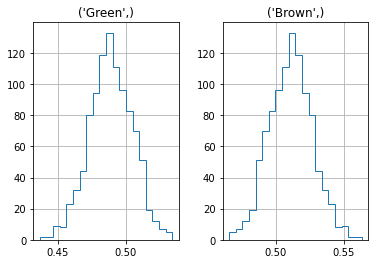

In [263]:
dist.hist(histtype='step', bins=20);

# # Chapter 4. Confidence Intervals

In [264]:
# Use random_sample from above, but put all the steps above into a single function, yielding a dataframe

def sampling_dist(bound, iterations):
    return pd.DataFrame([random_sample(bound, iterations).value_counts(normalize=True) for i in range(iterations)])

In [265]:
bound = .511
iterations=10_000
dist = sampling_dist(bound, iterations)

### get confidence levels using np.percentile()

In [266]:
ci_brown = np.percentile(dist.Brown, [2.5, 97.5])
print(dist.Brown.mean()[0])
ci_brown

0.5109936400000091


array([0.5011, 0.5208])

In [267]:
ci_green = np.percentile(dist.Green, [2.5, 97.5])
print(dist.Green.mean()[0])
ci_green

0.4890063599999922


array([0.4792, 0.4989])

### get confidence levels using pd quantile

In [268]:
# Michele uses quantile instead of np.percentile

# def get_quantiles(bound, iterations=1000):
#     dist = sampling_dist(bound, iterations)
#     return dist.Brown.quantile(.25), dist.Brown.quantile(.975)

In [269]:
np.array([dist.Brown.quantile(.025), dist.Brown.quantile(.975)])

array([[0.5011],
       [0.5208]])

In [270]:
np.array([dist.Green.quantile(.025), dist.Green.quantile(.975)])

array([[0.4792],
       [0.4989]])

In [271]:
def print_ci(data, lower_bound, upper_bound):
    ci = np.percentile(data, [lower_bound, upper_bound])
    mean =  data.mean()[0]

    neg_diff = round( mean - ci[0], 2)
    pos_dif = round( ci[1] - mean, 2)

    print(f"Estimate: {mean} minus {neg_diff} or plus {pos_dif} (at {upper_bound - lower_bound}% confidence)")

In [272]:
print_ci(dist.Brown, 2.5, 97.5)

Estimate: 0.5109936400000091 minus 0.01 or plus 0.01 (at 95.0% confidence)


In [273]:
print_ci(dist.Green, 2.5, 97.5)

Estimate: 0.4890063599999922 minus 0.01 or plus 0.01 (at 95.0% confidence)
